Unit Root and Cointegration
===========================

 Unit Root Process 
-------------------

A *covariance stationary* time series satisfies

1. $E[y_{t}]$ is a constant; 
2. $var[y_{t}]$ is a constant; 
3. $cov[y_{t},y_{s}]$ is a function of $|t-s|$ but not of $t$ or $s$. 

A time series is
*non-stationary* if one of these conditions are violated. 

Let
$\left(y_{t}\right)$ be an AR(1)
$$y_{t}=\beta+\gamma y_{t-1}+u_{t},\label{AR1}$$ where $(u_{t})$ is a
white noise with mean 0 and variance $\sigma^{2}$. If $|\gamma|<1$,
$E[y_{0}]=\beta/(1-\gamma)$ and $var[y_{0}]=\sigma^{2}/(1-\gamma^{2})$,
then this AR(1) is stationary.[^1] To verify this, we rewrite $y_{t}$ by
repeatedly substituting out the lag terms until $y_{0}$.
$$y_{t}=\beta+\gamma(\beta+\gamma y_{t-2}+u_{t-1})+u_{t}=\cdots=\gamma^{t}y_{0}+\beta\sum_{r=0}^{t-1}\gamma^{r}+\sum_{r=0}^{t-1}\gamma^{r}u_{t-r}$$
By the formula for geometric sums,
$$E[y_{t}]=\gamma^{t}\beta/(1-\gamma)+\beta(1-\gamma^{t})/(1-\gamma)=\beta/(1-\gamma)$$
$$var[y_{t}]=\sigma^{2}\gamma^{2t}/(1-\gamma^{2})+\sigma^{2}(1-\gamma^{2t})/(1-\gamma^{2})=\sigma^{2}/(1-\gamma^{2}).$$
Without loss of generality, for the covariance we can assume $t>s$.
$$\begin{aligned}
cov[y_{t},y_{s}] & = & cov\left[(u_{t}+\cdots+\gamma^{t-s}u_{s}+\cdots+\gamma^{t-1}u_{1}),(u_{s}+\cdots+\gamma^{s-1}u_{1})\right]+cov(\gamma^{t}y_{0},\gamma^{s}y_{0})\\
 & = & \gamma^{t-s}var[(u_{s}+\cdots+\gamma^{s-1}u_{1})]+\gamma^{t+s}var(y_{0})\\
 & = & \gamma^{t-s}\sigma^{2}\frac{1-\gamma^{2s}}{1-\gamma^{2}}+\gamma^{t+s}\sigma^{2}/\left(1-\gamma^{2}\right)\\
 & = & \gamma^{t-s}\sigma^{2}/(1-\gamma^{2})\end{aligned}$$ For general
$t$ and $s$, $cov[y_{t},y_{s}]=\gamma^{|t-s|}\sigma^{2}/(1-\gamma^{2})$
.

AR(1) with $\gamma=1$ is a *unit root process*. The above formulae no
longer apply when $\gamma=1$. Again, we substitute out the lag terms to
obtain
$$y_{t}=\beta+\gamma y_{t-1}+u_{t}=\cdots=y_{0}+t\beta+\sum_{r=1}^{t}u_{t},$$
so that $$\begin{aligned}
E[y_{t}] & = & E[y_{0}]+t\beta;\\
var[y_{t}] & = & var[y_{0}]+t\sigma^{2};\\
cov[y_{t},y_{s}] & = & var(y_{0})+\min(t,s)\sigma^{2}.\end{aligned}$$
The mean, the variance and the covariance vary with $t$ and $s$. Even if
$\beta=0$, the variance increases with $t$. In our R demonstration, we
witness very different behavior of a stationary AR and a non-stationary
AR.

**Code Example**

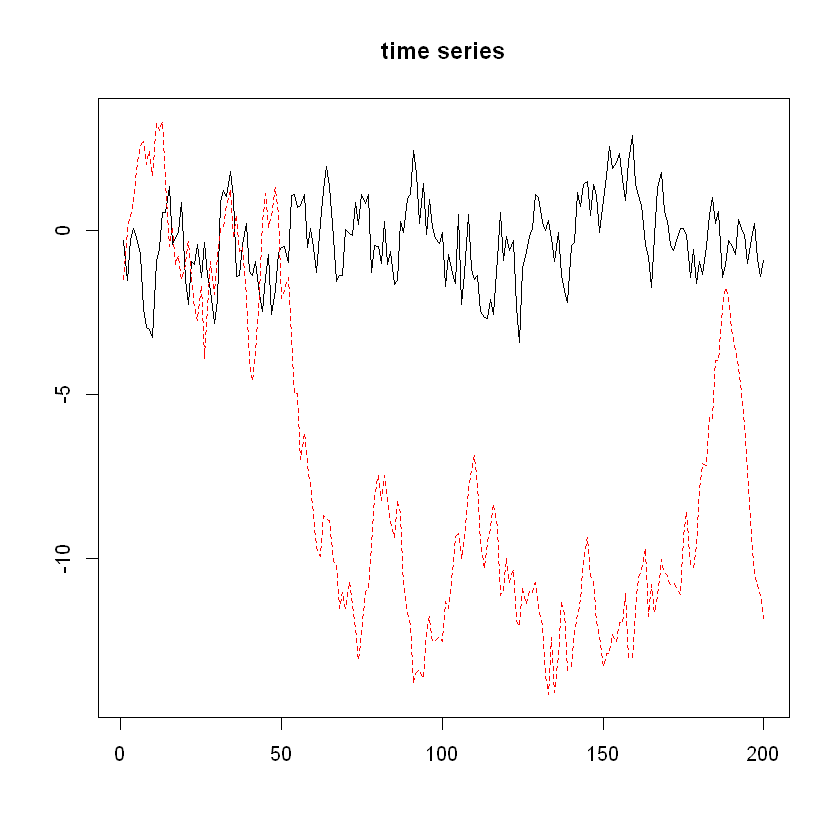

In [6]:
AR <- function(a,T){
  # a: the AR coefficient
  # T: time periods
  y <- rep(0, T)
  e <- rnorm(T)
  for (t in 1:T){
    if (t == 1) {
      y[t] <- e[t]
    } else {
      y[t] <- a * y[t-1] + e[t]
    }
  }
  return(y)
}

# generate a stationary AR(1) and a unit root time series. 

set.seed(999)
stationary <- AR(0.7, 200) # stationary 
ur <- AR(1, 200) # unit root 

matplot( cbind(stationary, ur), type = "l", ylab = "", main = "time series" ) 

Stationary and non-stationary time series have distinctive implications
in forecast. For simplicity, we set $\beta=0$. The $\tau$-period-ahead
conditional forecast mean for the stationary AR(1) is
$$E[y_{t+\tau}|y_{t}]=\gamma^{\tau}y_{t}.$$ It exhibits
*mean-reverting*the forecast mean conditional on $y_{t}$ converges to
the unconditional mean. Here
$E[y_{t+\tau}|y_{t}]\to0=E\left[y_{t}\right]$ as $\tau\to\infty$. In
contrast, in the non-stationary AR(1)
$$E[y_{t+\tau}|y_{t}]=y_{t},\mbox{ for all }\tau\in\mathbb{N}.\label{eq:martingale}$$
The conditional forecast means of all future $y_{t+\tau}$ are today’s
realization $y_{t}$. In the context of the financial market, the
*efficient market theory* claims that the present price reflects all the
information concerning a stock; therefore the future move cannot be
systematically forecast. This theory implies that the stock prices
satisfy (\[eq:martingale\]).

To check whether the real-world time series follow the implication of
the efficient market theory, a statistical test was developed under the
null hypothesis $H_{0}:\gamma=1.$ Notice that the standard theory for
OLS requires that the data are stationary. Under non-stationarity, the
OLS estimator is still consistent for the AR coefficient, but the
standard inference breaks down.

Instead of working with $\gamma$, it is common practice that we subtract
$y_{t-1}$ on both sides of (\[AR1\]) so that
$$\Delta y_{t}=\beta+\rho y_{t-1}+u_{t},$$ where
$\Delta y_{t}=y_{t}-y_{t-1}$ and $\rho=\gamma-1$. The null hypothesis
becomes $H_{0}:\rho=0$ under this reformulation, for which we can
directly read the $t$-ratio reported in statistical software.

The test statistic we use is the familiar $t$-ratio
$$t=\frac{\widehat{\rho}}{\mathrm{s.e.}(\widehat{\rho})}.$$ In standard
OLS theory, this $t$-ratio converges in distribution to a standard
normal random variable. In contrast, under the null the $t$-ratio
asymptotically follows a *Dicky-Fuller distribution* if $u_{t}$ is a
white noise.

Given the asymptotic distribution, we can compare the test statistic and
the desirable critical value for hypothesis testing. *Dicky-Fuller test*
considers $$H_{0}:\rho=0;\ \ \ \ \ H_{1}:\rho<0.$$ The critical value is
-2.88 for the 5% significance-level test with a drift[^2]. This value is
much smaller than -1.64, the 5% quantile of a standard normal
distribution.

In order to use the Dicky-Fuller distribution as the $t$-ratio’s
asymptotic distribution, the dynamics of $\left(y_{t}\right)$ must be
modeled such that $\left(u_{t}\right)$ is a white noise. When the
specification of AR(1) is insufficient for this purpose, we can add a
few lag terms into the regression
$$\Delta y_{t}=\beta+\rho y_{t-1}+\theta_{1}\Delta y_{t-1}+\cdots+\theta_{p}\Delta y_{t-p}+u_{t}$$
to make $u_{t}$ closer to a white noise. The *augmented Dicky-Fuller
test* takes the same testing procedure as the simple version.

**Code Example** We can invoke the Dicky-Fuller test from the R package `urca`. We test the stationarity for the two time series separately. 

In [7]:
library(urca)

# we first try the stationary time series
dftest <- ur.df(y = stationary, lag = 0, type = "drift")
summary(dftest)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.49302 -0.65091  0.04418  0.63825  2.43199 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.09238    0.06695  -1.380    0.169    
z.lag.1     -0.32039    0.05233  -6.123 4.89e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9218 on 197 degrees of freedom
Multiple R-squared:  0.1599,	Adjusted R-squared:  0.1556 
F-statistic: 37.49 on 1 and 197 DF,  p-value: 4.894e-09


Value of test-statistic is: -6.1227 18.7449 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.46 -2.88 -2.57
phi1  6.52  4.63  3.81


In [9]:
# next we try the random walk
dftest <- ur.df(y = ur, lag = 0, type = "drift")
print(dftest)


############################################################### 
# Augmented Dickey-Fuller Test Unit Root / Cointegration Test # 
############################################################### 

The value of the test statistic is: -1.5721 1.4984 



Spurious Regression and Cointegration
-------------------------------------

*This section is incomplete*.[^3]

Economists in the 60’s and 70’s were surprised that, when they ran OLS
for two seemingly unrelated time series, they often witnessed a high
$t$-ratio and a large $R^{2}$. This phenomenon, known as the *spurious
regression*, had been puzzling economists until it was demystified by
Phillips (1986). Phillips proved that when $y_{t}$ and $x_{t}$ are
independent unit root processes, neither the $t$-ratio nor $R^{2}$
converges in probability to a point. They become non-degenerate random
variables no matter how large the sample is.

If two unit root processes are independent, then $y_{t}-\gamma x_{t}$ is
a unit root time series for all $\gamma$. However, real-world
non-stationary time series can be linked. Such time series are said to
be *cointegrated*. For example, on the financial market the spot price
of gold and the future price of gold must be tightly connected. If the
future price is too low relative to the spot price, this arbitrage
opportunity will drive traders to buy future gold and sell spot gold.
These transactions will push down the spot price and pull up the future
price until they strike a balance again. Therefore it is of practical
importance to quantify the coefficient in a cointegration system.

The *Engle-Granger test* is a simple procedure to check cointegration.

1.  Run an OLS between $y_{t}$ and $x_{t}$, and save the residual
    $\widehat{u}_{t}$.

2.  Run an (augmented) Dicky-Fuller test for the time series
    $(\widehat{u}_{t})$ to check stationarity. The critical values can
    be found in Wooldridge(2012)’s Table 18.4.

[^1]: AR(1) with $\left|\gamma\right|<1$ is not stationary without the
    mean and the variance assumptions on $y_{0}$. This point is often
    ignored in heuristics as the role of $y_{0}$ becomes negligible in a
    long time series.

[^2]: *Drift* means that we include the constant in OLS

[^3]: Readers are referred to Wooldridge’s textbook (2012, Chapter 18.3
    and 18.4) for a detailed account of the spurious regression and
    cointegration. There is no point for me to fully develop this
    section.
    
**Simulation Example**
This is an example of the spurious regression. The two time series $\{y_t\}$ and $\{x_t\}$ are generated independently, so that $E[y_t|x_t] = 0$. However, we observe a high $R^2$ and large t-value if we regression $y_t$ against $x_t$.


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
     0.6365       0.9886  



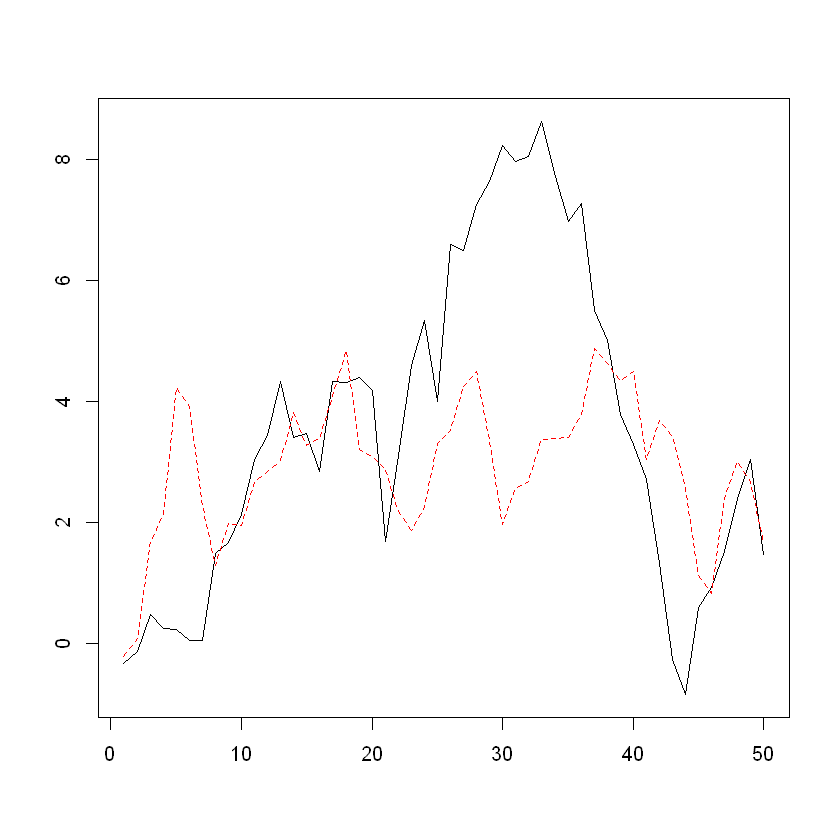

In [12]:
T = 50
a = 1

y <- AR(a, T)
x <- AR(a, T)
matplot( cbind(y, x), type = "l", ylab = "" )

reg <- lm(y ~ x)
print(reg)

We run a regression to check that if we naively use 1.96 as the critical value for the $t$-ratio, how often we would reject the null hypothesis that $\beta = 0$. 

In [13]:
spurious <- function(i, a, T){
    y <- AR(a, T)
    x <- AR(a, T)
}

library("plyr")
out <- ldply(.data = 1:100, .fun = spurious, a = 1, T = 100)
print( mean(out < 0.05) )

[1] 0.5413


The nominal asymptotic test size is $5\%$ according to the standard asymptotic theory. However, the empirical size, the percentage of times that rejects the null turns out to be dramatically larger in this simulation. The drastic deviation suggests that the standard asymptotic theory fails in the nonstationary environment.

**Real Data Example**

In [2]:
# FB <- read.csv("http://ichart.finance.yahoo.com/table.csv?s=FB")
library(quantmod)
library(urca)

getSymbols("FB", from = "2017-01-01", to = Sys.Date(), src = "yahoo")
print( head(FB) )

fb <- FB$FB.Close[1:150]
fb <- fb[151 - (1:150)] # reverse the order. From early to late

Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.
'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.


Please see the Warning section of '?getSymbols.yahoo' for details.

This message is shown once per session and may be disabled by setting
options("getSymbols.yahoo.warning"=FALSE).


[1] "FB"

           FB.Open FB.High FB.Low FB.Close FB.Volume FB.Adjusted
2017-01-03  116.03  117.84 115.51   116.86  20663900      116.86
2017-01-04  117.55  119.66 117.29   118.69  19630900      118.69
2017-01-05  118.86  120.95 118.32   120.67  19492200      120.67
2017-01-06  120.98  123.88 120.03   123.41  28545300      123.41
2017-01-09  123.55  125.43 123.04   124.90  22861600      124.90
2017-01-10  124.82  125.50 124.28   124.35  17324600      124.35



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3314 -0.7653 -0.2093  1.0059  4.4184 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.493075   1.548546   0.318    0.751
z.lag.1     -0.001012   0.010663  -0.095    0.925
z.diff.lag1 -0.093195   0.083911  -1.111    0.269
z.diff.lag2 -0.017921   0.083677  -0.214    0.831
z.diff.lag3  0.066224   0.083213   0.796    0.427

Residual standard error: 1.44 on 141 degrees of freedom
Multiple R-squared:  0.01351,	Adjusted R-squared:  -0.01448 
F-statistic: 0.4827 on 4 and 141 DF,  p-value: 0.7484


Value of test-statistic is: -0.0949 3.5461 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.46 -2.88 -2.57
phi1  6.52  4.63  3.81


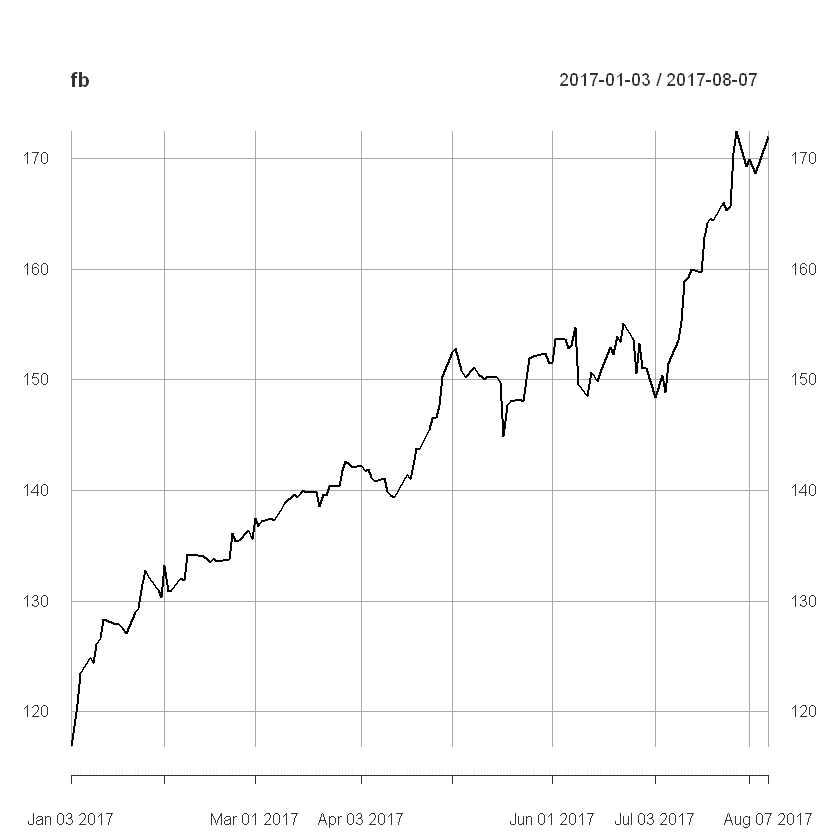

In [3]:
plot(fb, type = "l", xlab = "", ylab = "price")
dftest <- ur.df(y = fb, lags = 3, type = "drift")
summary(dftest)

In [4]:
getSymbols("GOOG", from = "2017-01-01", to = Sys.Date(), src = "yahoo")
print( head(GOOG) )

tw <- GOOG$GOOG.Close[1:150]
tw <- tw[151 - (1:150)] # reverse the order. From early to late

[1] "GOOG"

           GOOG.Open GOOG.High GOOG.Low GOOG.Close GOOG.Volume GOOG.Adjusted
2017-01-03    778.81   789.630  775.800     786.14     1657300        786.14
2017-01-04    788.36   791.340  783.160     786.90     1073000        786.90
2017-01-05    786.08   794.480  785.020     794.02     1335200        794.02
2017-01-06    795.26   807.900  792.204     806.15     1640200        806.15
2017-01-09    806.40   809.966  802.830     806.65     1272400        806.65
2017-01-10    807.86   809.130  803.510     804.79     1176800        804.79


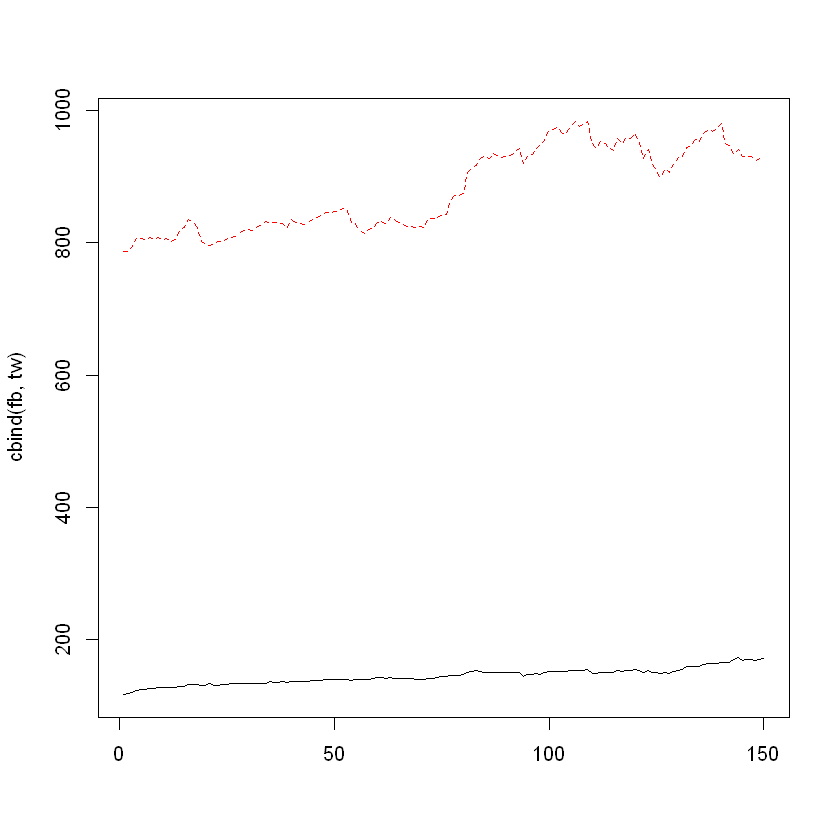


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3560 -0.6123 -0.0902  0.5908  6.3293 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.144655   0.100668   1.437    0.153
z.lag.1     -0.003578   0.018130  -0.197    0.844
z.diff.lag1  0.058375   0.086012   0.679    0.498
z.diff.lag2  0.137698   0.085618   1.608    0.110
z.diff.lag3  0.066837   0.085747   0.779    0.437

Residual standard error: 1.175 on 141 degrees of freedom
Multiple R-squared:  0.02863,	Adjusted R-squared:  0.001077 
F-statistic: 1.039 on 4 and 141 DF,  p-value: 0.3893


Value of test-statistic is: -0.1974 1.0772 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.46 -2.88 -2.57
phi1  6.52  4.63  3.81


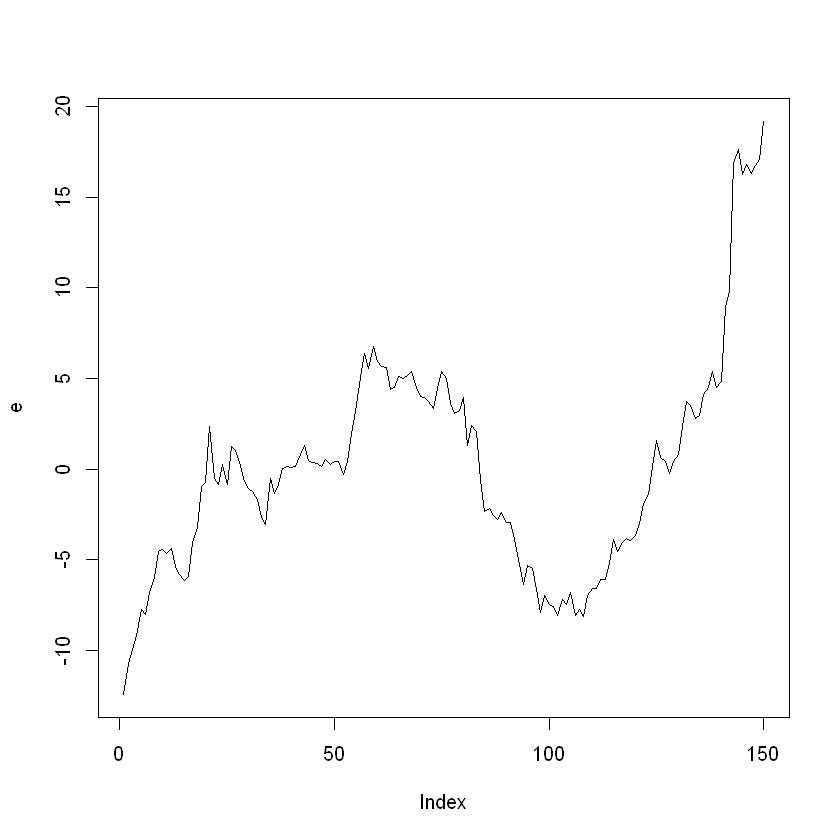

In [5]:
# cointegration
matplot(cbind(fb, tw), type = "l")

ols <- lm(fb ~ tw)
e <- as.numeric( ols$residuals )

plot(e, type = "l")
dftest <- ur.df(y = e, lags = 3, type = "drift")
summary(dftest)